# API of Twitter.

### **Solution to get data in twitter.**

In [ ]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
query = '#Premierleague'

In [ ]:
df = pd.DataFrame(columns= ['user', 'text', 'hashtag', 'create','location'])

In [ ]:
for tweet in tweepy.Cursor(api.search,q=query,count=300,result_type='recent',tweet_mode='extended').items():
    entity_hashtag = tweet.entities.get('hashtags')
    hashtag = ''
    for i in range(0,len(entity_hashtag)):
       hashtag = hashtag +'/' + entity_hashtag[i]['text']
    user = tweet.user.name
    create_at = tweet.created_at
    loc = tweet.user.location
    try:
        text = tweet.retweeted_status.full_text
        fav_count = tweet.retweeted_status.favorite_count
    except:
        text = tweet.full_text
        fav_count = tweet.favorite_count
    # new_column = pd.Series([create_at,text,hashtag,re_count,fav_count,loc], index=df.columns)
    new_column = pd.Series([user,text,hashtag,create_at,loc], index=df.columns)
    df = df.append(new_column,ignore_index=True)


In [ ]:
df.to_csv('DataFromTwitter.csv')

# API of Reddit.

### **Solution to get data in Reddit.**

In [ ]:
pip install psaw

In [ ]:
from datetime import datetime
from psaw import PushshiftAPI

api = PushshiftAPI()

In [ ]:
start_epoch=int(datetime(2021, 8, 1).timestamp()) #start_date
end_epoch=int(datetime(2022, 3, 29).timestamp()) #end_date

In [ ]:
submissions = api.search_submissions(subreddit="premierleague", limit=10000, after = start_epoch, before = end_epoch)

df_api = pd.DataFrame(submissions)

In [ ]:
for index in range(0,len(df_api['created_utc'])) :
  df_api['created_utc'][index] = datetime.fromtimestamp(df_api['created_utc'][index]).strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
df_api.to_csv('DataFromReddit1.csv')

# Get data from file Twitter.

In [111]:
import pandas as pd
df_twitter = pd.read_csv("DataFromTwitter.csv")

In [112]:
df_twitter.shape

(18311, 6)

# Get data from file reddit.

In [4]:
import pandas as pd

In [5]:
df_real = pd.read_csv('DataFromReddit.csv')
df = df_real.copy()

C:\Users\poohp\AppData\Local\Temp\ipykernel_2660\3872430671.py:1: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df_real = pd.read_csv('DataFromReddit.csv')


In [6]:
df.shape

(10000, 90)

#Clean / Format Data

# Clean data form twitter.

**Duplicated data.**

In [113]:
import re

In [114]:
df_twitter.head(5)

,Unnamed: 0,user,text,hashtag,create,location
0,0,Kate,Huge weekend of fixtures coming up!🤩\n\nMan Ut...,NaN,2022-03-29 19:06:51,NaN
1,1,Steve Fred Brooker,Huge weekend of fixtures coming up!🤩\n\nMan Ut...,NaN,2022-03-29 19:06:36,NaN
2,2,Edilton Silva 🇾🇪🇳🇬,Jürgen Klopp 🇩🇪 Outfit Collection for #FIFA22 ...,/FIFA22,2022-03-29 19:04:39,Salvador Ba
3,3,michael hickey,As it's Marc Overmars' birthday today I though...,/Arsenal,2022-03-29 19:04:16,London UK
4,4,ChernyVolk - The Outcast,Virtual Bundesliga ed ePremier League nel week...,/esports/fifa/Bundesliga,2022-03-29 19:02:30,Terra di lavoro


In [115]:
df_twitter = df_twitter.drop([('Unnamed: 0')], axis = 1)

In [116]:
df_twitter.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18306     True
18307     True
18308     True
18309     True
18310     True
Length: 18311, dtype: bool

In [117]:
print(df_twitter.shape)
df_twitter.drop_duplicates(inplace=True)
print(df_twitter.shape)

(18311, 5)
(9155, 5)


**Check data is null**

In [118]:
df_twitter.isna().sum()

user           0
text           0
hashtag     1374
create         0
location    4079
dtype: int64

**Manage format of data.**

In [119]:
new = df_twitter["create"].str.split(' ', n = 1, expand = True) 
df_twitter["date"] = new[0]
df_twitter ["time"] = new[1]
df_twitter.head(5)

,user,text,hashtag,create,location,date,time
0,Kate,Huge weekend of fixtures coming up!🤩\n\nMan Ut...,NaN,2022-03-29 19:06:51,NaN,2022-03-29,19:06:51
1,Steve Fred Brooker,Huge weekend of fixtures coming up!🤩\n\nMan Ut...,NaN,2022-03-29 19:06:36,NaN,2022-03-29,19:06:36
2,Edilton Silva 🇾🇪🇳🇬,Jürgen Klopp 🇩🇪 Outfit Collection for #FIFA22 ...,/FIFA22,2022-03-29 19:04:39,Salvador Ba,2022-03-29,19:04:39
3,michael hickey,As it's Marc Overmars' birthday today I though...,/Arsenal,2022-03-29 19:04:16,London UK,2022-03-29,19:04:16
4,ChernyVolk - The Outcast,Virtual Bundesliga ed ePremier League nel week...,/esports/fifa/Bundesliga,2022-03-29 19:02:30,Terra di lavoro,2022-03-29,19:02:30


**Drop column is not to use.**

In [120]:
df_twitter = df_twitter.drop(columns =['hashtag','create','location'],axis = 1)
df_twitter.head(5) 

,user,text,date,time
0,Kate,Huge weekend of fixtures coming up!🤩\n\nMan Ut...,2022-03-29,19:06:51
1,Steve Fred Brooker,Huge weekend of fixtures coming up!🤩\n\nMan Ut...,2022-03-29,19:06:36
2,Edilton Silva 🇾🇪🇳🇬,Jürgen Klopp 🇩🇪 Outfit Collection for #FIFA22 ...,2022-03-29,19:04:39
3,michael hickey,As it's Marc Overmars' birthday today I though...,2022-03-29,19:04:16
4,ChernyVolk - The Outcast,Virtual Bundesliga ed ePremier League nel week...,2022-03-29,19:02:30


**Manage format of data.**

Credit : P'Fang

In [121]:
df_twitter["tweet"] = df_twitter['text'].apply(lambda msg: re.sub("https*\S+", " ", msg)).apply(lambda msg: re.sub("@\S+", " ", msg)).apply( lambda msg: " ".join(msg.split())) 
df_twitter.head()

,user,text,date,time,tweet
0,Kate,Huge weekend of fixtures coming up!🤩\n\nMan Ut...,2022-03-29,19:06:51,Huge weekend of fixtures coming up!🤩 Man Utd v...
1,Steve Fred Brooker,Huge weekend of fixtures coming up!🤩\n\nMan Ut...,2022-03-29,19:06:36,Huge weekend of fixtures coming up!🤩 Man Utd v...
2,Edilton Silva 🇾🇪🇳🇬,Jürgen Klopp 🇩🇪 Outfit Collection for #FIFA22 ...,2022-03-29,19:04:39,Jürgen Klopp 🇩🇪 Outfit Collection for #FIFA22 ...
3,michael hickey,As it's Marc Overmars' birthday today I though...,2022-03-29,19:04:16,As it's Marc Overmars' birthday today I though...
4,ChernyVolk - The Outcast,Virtual Bundesliga ed ePremier League nel week...,2022-03-29,19:02:30,Virtual Bundesliga ed ePremier League nel week...


In [122]:
print(len(df_twitter))

9155


**Remove emoji in text.**

Credit : [saaranshM](https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b)

In [123]:
def removeEmoji(text):
    re_pattern = re.compile(pattern = "["
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                               u"\U00002500-\U00002BEF"  # Chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               "]+", flags = re.UNICODE)
    return re_pattern.sub(r'',text)

ListNotEmoji = []
for text in df_twitter["tweet"]:
  ListNotEmoji.append(removeEmoji(text))
df_twitter['tweet'] = ListNotEmoji 

In [124]:
df_twitter.head(5)

,user,text,date,time,tweet
0,Kate,Huge weekend of fixtures coming up!🤩\n\nMan Ut...,2022-03-29,19:06:51,Huge weekend of fixtures coming up! Man Utd v ...
1,Steve Fred Brooker,Huge weekend of fixtures coming up!🤩\n\nMan Ut...,2022-03-29,19:06:36,Huge weekend of fixtures coming up! Man Utd v ...
2,Edilton Silva 🇾🇪🇳🇬,Jürgen Klopp 🇩🇪 Outfit Collection for #FIFA22 ...,2022-03-29,19:04:39,Jürgen Klopp Outfit Collection for #FIFA22 DL...
3,michael hickey,As it's Marc Overmars' birthday today I though...,2022-03-29,19:04:16,As it's Marc Overmars' birthday today I though...
4,ChernyVolk - The Outcast,Virtual Bundesliga ed ePremier League nel week...,2022-03-29,19:02:30,Virtual Bundesliga ed ePremier League nel week...


In [125]:
df_twitter = df_twitter.drop('text',axis=1 )

In [126]:
df_twitter = df_twitter[["user","tweet","date","time"]]
df_twitter.columns = ["user","text","date","time"]

In [128]:
df_twitter.head(5)

,user,text,date,time
0,Kate,Huge weekend of fixtures coming up! Man Utd v ...,2022-03-29,19:06:51
1,Steve Fred Brooker,Huge weekend of fixtures coming up! Man Utd v ...,2022-03-29,19:06:36
2,Edilton Silva 🇾🇪🇳🇬,Jürgen Klopp Outfit Collection for #FIFA22 DL...,2022-03-29,19:04:39
3,michael hickey,As it's Marc Overmars' birthday today I though...,2022-03-29,19:04:16
4,ChernyVolk - The Outcast,Virtual Bundesliga ed ePremier League nel week...,2022-03-29,19:02:30


**Manage format time**

In [129]:
# sort record by date.
df_twitter = df_twitter.sort_values(by=["date","time"])
df_twitter = df_twitter.reset_index()
df_twitter = df_twitter.drop("index",axis=1)
df_twitter.head(5)

,user,text,date,time
0,Brandon Doan,Real Madrid have surely lost Erling Haaland to...,2022-03-21,11:30:34
1,Phil Goaten ⁶₆⁷,Manchester City and Liverpool fans and face tr...,2022-03-21,11:34:16
2,Brandon Doan,Manchester City and Liverpool fans and face tr...,2022-03-21,11:34:25
3,Nedu2010,Getting Top 4 in the Premier League in 2022 is...,2022-03-21,11:34:35
4,Gabriel,Kevin De Bruyne: “I think the reaction was rea...,2022-03-21,11:35:05


# Clean data from reddit.

**Manage format of data.**

In [26]:
column = ['author','title','created_utc']
df_reddit = df.loc[:,column]

In [27]:
df_reddit.columns = ['user','text','timedate']

**Check type data.**

In [28]:
df_reddit.dtypes

user        object
text        object
timedate    object
dtype: object

**Duplicate**

In [29]:
# manage duplicate
df_reddit.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [30]:
# show duplicate
print(df_reddit[df_reddit.duplicated()])

                    user                                               text  \
1132             Malino6  Question for opposition fans about where they ...   
3695            ashstar1  Currently the Newcastle Vs United game isn't t...   
3751  InnerAsparagus6045                       Rangers 2 year contract !!!!   
4245      PremTipsterFPL  2 Points lost by both sides, City are the big ...   
9300             2mas2nd                         Ballon dor Wikipedia troll   

                 timedate  
1132  2021-09-03 20:30:50  
3695  2021-08-28 00:01:04  
3751  2021-10-04 16:45:01  
4245  2022-01-02 18:28:20  
9300  2021-11-29 20:34:02  


In [31]:
# delete duplicate
print(df_reddit.shape)
df_reddit.drop_duplicates(inplace=True)
print(df_reddit.shape)

(10000, 3)
(9995, 3)


**Check data is null.**

In [32]:
# check data is null.
df_reddit.isna().sum()

user        0
text        0
timedate    0
dtype: int64

**Clean data format " https.. and @.. ".**

Credit : P'Fang

In [33]:
import re
df_reddit["text"] = df_reddit['text'].apply(lambda msg: re.sub("https*\S+", " ", msg)).apply(lambda msg: re.sub("@\S+", " ", msg)).apply(lambda msg: " ".join(msg.split())) 
    
df_reddit.head()

,user,text,timedate
0,ashhennessy2,I drew a portrait of Mo Salah,2022-03-28 23:30:47
1,DCraig88,when your 1st choice striker doesn't exist,2022-03-28 23:01:14
2,MOTDish,Can Haaland and Mbappe become better than Mess...,2022-03-28 21:29:10
3,SwingingBacon289,"Who do you think will win the League, Who will...",2022-03-28 20:48:19
4,TurnipPrize3746,does anyone know where I can find the tottenha...,2022-03-28 20:18:47


**Remove emoji in text.**

Credit : [saaranshM](https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b)

In [34]:
df_reddit.head(5)

,user,text,timedate
0,ashhennessy2,I drew a portrait of Mo Salah,2022-03-28 23:30:47
1,DCraig88,when your 1st choice striker doesn't exist,2022-03-28 23:01:14
2,MOTDish,Can Haaland and Mbappe become better than Mess...,2022-03-28 21:29:10
3,SwingingBacon289,"Who do you think will win the League, Who will...",2022-03-28 20:48:19
4,TurnipPrize3746,does anyone know where I can find the tottenha...,2022-03-28 20:18:47


In [36]:
def removeEmoji(text):
    re_pattern = re.compile(pattern = "["
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                               u"\U00002500-\U00002BEF"  # Chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               "]+", flags = re.UNICODE)
    return re_pattern.sub(r'',text)

ListNotEmoji = []
for text in df_reddit["text"]:
  ListNotEmoji.append(removeEmoji(text))

In [37]:
# before remove
df_reddit["text"][15]

'The question must be asked?😂😂🤔'

In [38]:
# insert data of list not emoji in df_reddit["text"];
df_reddit["text"] = ListNotEmoji

In [39]:
# after remove.
df_reddit["text"][15]

'The question must be asked?'

**format time**

In [40]:
new = df_reddit["timedate"].str.split(' ', n = 1, expand = True) 
df_reddit["date"] = new[0]
df_reddit ["time"] = new[1]
df_reddit = df_reddit.drop('timedate',axis=1)
df_reddit.head(5)

,user,text,date,time
0,ashhennessy2,I drew a portrait of Mo Salah,2022-03-28,23:30:47
1,DCraig88,when your 1st choice striker doesn't exist,2022-03-28,23:01:14
2,MOTDish,Can Haaland and Mbappe become better than Mess...,2022-03-28,21:29:10
3,SwingingBacon289,"Who do you think will win the League, Who will...",2022-03-28,20:48:19
4,TurnipPrize3746,does anyone know where I can find the tottenha...,2022-03-28,20:18:47


In [41]:
# sort record by date.
df_reddit = df_reddit.sort_values(by=["date","time"])
df_reddit = df_reddit.reset_index()
df_reddit = df_reddit.drop("index",axis=1)
df_reddit.head(5)

,user,text,date,time
0,Spursfan-Coys,For those of you that say Chelsea fans aren’t ...,2021-08-01,00:01:03
1,AutoModerator,r/PremierLeague Daily Discussion,2021-08-01,04:00:26
2,Willpowers1200,Is mikel areteta the right answer for Arsenal ...,2021-08-01,04:03:18
3,fatesgift,[The Athletic] Arsenal consider signing Lautar...,2021-08-01,04:20:30
4,Purpledoodlesx,What’s the opinion of Villa fans on here on Gr...,2021-08-01,05:54:32


# EDA (Global Properties)

### Reddit

In [42]:
# head
df_reddit.head(5)

,user,text,date,time
0,Spursfan-Coys,For those of you that say Chelsea fans aren’t ...,2021-08-01,00:01:03
1,AutoModerator,r/PremierLeague Daily Discussion,2021-08-01,04:00:26
2,Willpowers1200,Is mikel areteta the right answer for Arsenal ...,2021-08-01,04:03:18
3,fatesgift,[The Athletic] Arsenal consider signing Lautar...,2021-08-01,04:20:30
4,Purpledoodlesx,What’s the opinion of Villa fans on here on Gr...,2021-08-01,05:54:32


In [43]:
# tail 9727
df_reddit.tail(300)

,user,text,date,time
9695,Cute_Dragonfly_4728,What are all the “Come On You ____ “ for the P...,2022-03-20,12:51:56
9696,MatchCaster,[Match thread] Leicester vs Brentford,2022-03-20,13:15:49
9697,coronakashooter,Athletic apk,2022-03-20,14:02:13
9698,Emenfn,Who has the best chance of becoming the 7th to...,2022-03-20,14:20:26
9699,Iennda,Everton under Lampard,2022-03-20,14:26:53
...,...,...,...,...
9990,TurnipPrize3746,does anyone know where I can find the tottenha...,2022-03-28,20:18:47
9991,SwingingBacon289,"Who do you think will win the League, Who will...",2022-03-28,20:48:19
9992,MOTDish,Can Haaland and Mbappe become better than Mess...,2022-03-28,21:29:10
9993,DCraig88,when your 1st choice striker doesn't exist,2022-03-28,23:01:14


In [44]:
# shape
df_reddit.shape

(9995, 4)

In [45]:
# info
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    9995 non-null   object
 1   text    9995 non-null   object
 2   date    9995 non-null   object
 3   time    9995 non-null   object
dtypes: object(4)
memory usage: 312.5+ KB


**วันที่ผู้คนโพสต์มากที่สุด ของ Reddit โดยผ่าน key "Premier league"** 

In [ ]:
pd.set_option('display.max_rows', df_reddit.shape[0]+1)
df_reddit

In [48]:
MostTimeToPostInReddit = df_reddit['date'].value_counts().sort_index().reset_index()
MostTimeToPostInReddit.columns = ['Date','Count']
MostTimeToPostInReddit = MostTimeToPostInReddit.sort_values(by=['Count'],ignore_index=True,ascending=False)

In [49]:
MostTimeToPostInReddit.head(10)

,Date,Count
0,2021-08-13,113
1,2021-08-27,105
2,2021-08-15,103
3,2021-08-28,95
4,2022-01-01,91
5,2021-08-05,90
6,2021-10-24,89
7,2022-02-26,87
8,2021-09-11,86
9,2021-08-10,82


### Twitter

In [130]:
# head
df_twitter.head(5)

,user,text,date,time
0,Brandon Doan,Real Madrid have surely lost Erling Haaland to...,2022-03-21,11:30:34
1,Phil Goaten ⁶₆⁷,Manchester City and Liverpool fans and face tr...,2022-03-21,11:34:16
2,Brandon Doan,Manchester City and Liverpool fans and face tr...,2022-03-21,11:34:25
3,Nedu2010,Getting Top 4 in the Premier League in 2022 is...,2022-03-21,11:34:35
4,Gabriel,Kevin De Bruyne: “I think the reaction was rea...,2022-03-21,11:35:05


In [131]:
df_twitter.tail(5)

,user,text,date,time
9150,FootyZone.net,CHOOSE YOUR TEAM Welcome to the league #AAVE ...,2022-03-29,19:10:42
9151,Local Prizes,Huge weekend of fixtures coming up! Man Utd v ...,2022-03-29,19:11:03
9152,Igor,Man United vs Leicester city X2 ticket availab...,2022-03-29,19:11:06
9153,1xbet promo code: TAHMINBAHIS,#love #twitterers #smile #picoftheday #follow ...,2022-03-29,19:12:00
9154,Pablo Ureña,Huge weekend of fixtures coming up! Man Utd v ...,2022-03-29,19:13:47


In [132]:
# shape
df_twitter.shape

(9155, 4)

In [133]:
# info
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9155 entries, 0 to 9154
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    9155 non-null   object
 1   text    9155 non-null   object
 2   date    9155 non-null   object
 3   time    9155 non-null   object
dtypes: object(4)
memory usage: 286.2+ KB


**วันที่ผู้คนโพสต์มากที่สุด ของ Twitter โดยผ่าน key "Premier league"** 

In [ ]:
pd.set_option('display.max_rows', df_twitter.shape[0]+1)
df_twitter

In [55]:
MostTimeToPostInTwitter = df_twitter['date'].value_counts().sort_index().reset_index()
MostTimeToPostInTwitter.columns = ['Date','Count']
MostTimeToPostInTwitter = MostTimeToPostInTwitter.sort_values(by=['Count'],ignore_index=True,ascending=False)

In [135]:
MostTimeToPostInTwitter.head(10)

,Date,Count
0,2022-03-23,1337
1,2022-03-22,1291
2,2022-03-24,1205
3,2022-03-25,930
4,2022-03-26,929
5,2022-03-28,912
6,2022-03-29,867
7,2022-03-27,847
8,2022-03-21,837


### **Solution to get data in Reddit.**

# คนกล่าวถึงทีมฟุตบอลในพรีเมียร์ลีกทีมไหนมากสุด ในช่วง 7 วันย้อนหลังนี้ของ Twitter และ Reddit

### **Reddit**

In [137]:
nameTeam = ['Manchester City','Liverpool','Chelsea','Arsenal','Tottenham hotspur','Manchester United','West Ham United', 'Wolverhampton Wanderers', 'Aston Villa', 'Leicester City','Southampton', 'Crystal Palace', 'Brighton and Hove Albion', 'Newcastle United', 'Brentford', 'Leeds United', 'Everton','Watford', 'Burnley', 'Norwich City']
count_team = []
dict_soccer_reddit = {}
pattern = ["(Manchester City|manchester city|Man city|man city | MUFC |mufc|ManchesterUnited|manchesterunitedatleti|Ronaldo)",
           "(Liverpool|LiverpoolFC|liverpoolFC|awlive|awlive city|YNWA|LIVBAR|liverpoollegends|Anfield|LFC|LFClegends|lfc|LivBar|StevieG)",
           "(Chelsea|chelsea|ChelseaFC|CFC|cfc|ThiagoSilva|CFCPidgin)",
           "(Arsenal|arsenal|afc|Arsenalfc|COYG|coyg|nicolaspepe|Pepe|BHAARS|AFTV)",
           "(Tottenham hotspur|tottenham hotspur|Hotspur|hotspur|THFC|thfc|tottenham|Tottenham)",
           "(Manchester United|manchester united|Man united|man united|MUFC|mufc|ManUtd|ManUnited|ManchesterUnited)",
           "(West Ham United|west ham united|westhamacademy|westhamlegend|WestHamUtd|westham|WHUFFC)",
           "(wolverhamptonwanderers|wolverhampton wanderers|Wolves|WWFC|wwfc|WolvesAyWe|WolvesFC)",
           "(aston villa|Aston Villa|AstonVilla|avfc|AVFC|ASTONVILLA|astonvillafc|astonvillafootballclub)",
           "(LeicesterCity|leicester city|LCFC|lcfc|Madders)",
           "(SouthamptonFC|southampton|SFC|sfc)",
           "(CrystalPalaceFC|crystalpalacefc|CPFC|cpfc|CrystalPalace)",
           "(Brighton and Hove Albion|brighton and hove albion|BHAFC|bhafc)",
           "(newcastle united|Newcastle United|NUFC|nufc|NUFCFans|newcastleunited)",
           "(Brentford|brentford|BrentfordFC|brentfordfc)",
           "(Leeds United|leeds united|LUFC|lufc|LUFCLoanWatch|lufcloanwatch|LeedsUnited|LUFCStats)",
           "(Everton|everton|EvertonFC|evertonfc|EvertonToTheChampionship|EFC|efc)",
           "(WatfordFC|watfordfc)", "(Burnley|burnley|BurnleyFC|burnleyfc|burnleyFC)",
           "(Norwich City|norwich city|norwich cityfc|Norwich CityFC|NorwichCityFC|norwichcityfc|ncfc|NCFC)"]
for index in range(len(nameTeam)):
  team = []
  for text in df_reddit['text'][9728:]:
    if re.findall(pattern[index], text):
      team.append(1)
  dict_soccer_reddit[nameTeam[index]] = sum(team)

In [138]:
dict_soccer_reddit

{'Manchester City': 8,
 'Liverpool': 18,
 'Chelsea': 13,
 'Arsenal': 10,
 'Tottenham hotspur': 3,
 'Manchester United': 8,
 'West Ham United': 0,
 'Wolverhampton Wanderers': 0,
 'Aston Villa': 0,
 'Leicester City': 0,
 'Southampton': 0,
 'Crystal Palace': 0,
 'Brighton and Hove Albion': 0,
 'Newcastle United': 0,
 'Brentford': 0,
 'Leeds United': 0,
 'Everton': 5,
 'Watford': 0,
 'Burnley': 2,
 'Norwich City': 0}

In [139]:
data = {'Team' : dict_soccer_reddit.keys(),'Mention':dict_soccer_reddit.values()}
show_answer_form_reddit = pd.DataFrame(data)
show_answer_form_reddit.sort_values(by=['Mention'],ignore_index=True,inplace=True, ascending=False)
show_answer_form_reddit.index += 1
show_answer_form_reddit

,Team,Mention
1,Liverpool,18
2,Chelsea,13
3,Arsenal,10
4,Manchester City,8
5,Manchester United,8
6,Everton,5
7,Tottenham hotspur,3
8,Burnley,2
9,Newcastle United,0
10,Watford,0


In [140]:
count = []
for v in show_answer_form_reddit["Mention"]:
  count.append(v)
sum(count)

67

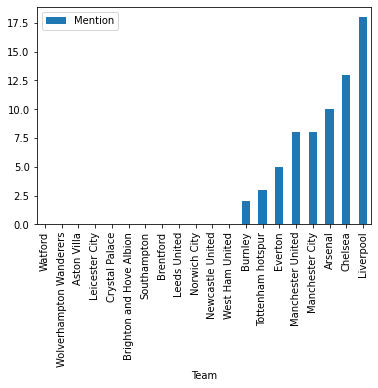

In [141]:
import matplotlib.pyplot as plt

show_answer_form_reddit.sort_values('Mention', inplace=True)
show_answer_form_reddit.plot(x ='Team', y='Mention',kind = 'bar')
plt.show()

### **Twitter**

In [ ]:
nameTeam = ['Manchester City','Liverpool','Chelsea','Arsenal','Tottenham hotspur','Manchester United','West Ham United', 'Wolverhampton Wanderers', 'Aston Villa', 'Leicester City','Southampton', 'Crystal Palace', 'Brighton and Hove Albion', 'Newcastle United', 'Brentford', 'Leeds United', 'Everton','Watford', 'Burnley', 'Norwich City']
dict_soccer_twiiter = {}

pattern = ["(Manchester City|manchester city|Man city|man city | MUFC |mufc|ManchesterUnited|manchesterunitedatleti|Ronaldo)",
           "(Liverpool|LiverpoolFC|liverpoolFC|awlive|awlive city|YNWA|LIVBAR|liverpoollegends|Anfield|LFC|LFClegends|lfc|LivBar|StevieG)",
           "(Chelsea|chelsea|ChelseaFC|CFC|cfc|ThiagoSilva|CFCPidgin)",
           "(Arsenal|arsenal|afc|Arsenalfc|COYG|coyg|nicolaspepe|Pepe|BHAARS|AFTV)",
           "(Tottenham hotspur|tottenham hotspur|Hotspur|hotspur|THFC|thfc|tottenham|Tottenham)",
           "(Manchester United|manchester united|Man united|man united|MUFC|mufc|ManUtd|ManUnited|ManchesterUnited)",
           "(West Ham United|west ham united|westhamacademy|westhamlegend|WestHamUtd|westham|WHUFFC)",
           "(wolverhamptonwanderers|wolverhampton wanderers|Wolves|WWFC|wwfc|WolvesAyWe|WolvesFC)",
           "(aston villa|Aston Villa|AstonVilla|avfc|AVFC|ASTONVILLA|astonvillafc|astonvillafootballclub)",
           "(LeicesterCity|leicester city|LCFC|lcfc|Madders)",
           "(SouthamptonFC|southampton|SFC|sfc)",
           "(CrystalPalaceFC|crystalpalacefc|CPFC|cpfc|CrystalPalace)",
           "(Brighton and Hove Albion|brighton and hove albion|BHAFC|bhafc)",
           "(newcastle united|Newcastle United|NUFC|nufc|NUFCFans|newcastleunited)",
           "(Brentford|brentford|BrentfordFC|brentfordfc)",
           "(Leeds United|leeds united|LUFC|lufc|LUFCLoanWatch|lufcloanwatch|LeedsUnited|LUFCStats)",
           "(Everton|everton|EvertonFC|evertonfc|EvertonToTheChampionship|EFC|efc)",
           "(WatfordFC|watfordfc)",
           "(Burnley|burnley|BurnleyFC|burnleyfc|burnleyFC)",
           "(Norwich City|norwich city|norwich cityfc|Norwich CityFC|NorwichCityFC|norwichcityfc|ncfc|NCFC)"]

for index in range(len(nameTeam)):
  team = []
  for text in df_twitter['text']:
    if re.findall(pattern[index], text):
      team.append(1)
  dict_soccer_twiiter[nameTeam[index]] = sum(team)

In [143]:
data = {'Team' : dict_soccer_twiiter.keys(),'Mention':dict_soccer_twiiter.values()}
show_answer_form_twitter = pd.DataFrame(data)
show_answer_form_twitter.sort_values(by=['Mention'],ignore_index=True,inplace=True, ascending=False)
show_answer_form_twitter.index += 1
show_answer_form_twitter

,Team,Mention
1,Chelsea,1713
2,Manchester City,1280
3,Manchester United,1155
4,Liverpool,925
5,Arsenal,821
6,Tottenham hotspur,429
7,Aston Villa,177
8,Everton,171
9,Brentford,158
10,Leeds United,146


In [145]:
count = []
for v in show_answer_form_twitter["Mention"]:
  count.append(v)
sum(count)

7459

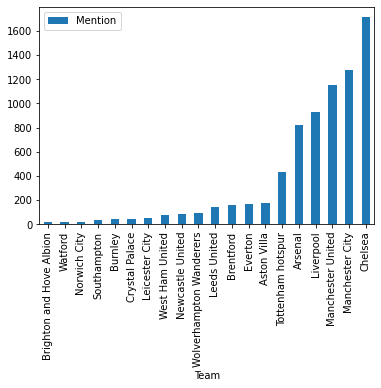

In [147]:
import matplotlib.pyplot as plt

show_answer_form_twitter.sort_values('Mention', inplace=True)
show_answer_form_twitter.plot(x ='Team', y='Mention',kind = 'bar')
plt.show()

#Future Engineering

### **twitter**

Get hashtag by record in data twitter.

In [148]:
df_twitter_for_futureengineering = df_twitter.copy()

In [149]:
list_post = []
list_tag = []
for text in df_twitter_for_futureengineering['text']:
  post = re.sub("#\S+",'',text)
  if '#' in text:
    tag = re.findall('#\S+', text)
    hashtag = " ".join(tag)
    list_post.append(post)
    list_tag.append(hashtag)
  else:
    list_post.append(post)

In [150]:
df_twitter['text'] = list_post
df_twitter['Hashtag'] = list_tag

In [151]:
df_twitter.head(5)

,user,text,date,time,Hashtag
0,Brandon Doan,Real Madrid have surely lost Erling Haaland to...,2022-03-21,11:30:34,#Haaland #MCFC #PremierLeague #UCL
1,Phil Goaten ⁶₆⁷,Manchester City and Liverpool fans and face tr...,2022-03-21,11:34:16,#MCFC #FACup #PremierLeague #UCL
2,Brandon Doan,Manchester City and Liverpool fans and face tr...,2022-03-21,11:34:25,#MCFC #FACup #PremierLeague #UCL
3,Nedu2010,Getting Top 4 in the Premier League in 2022 is...,2022-03-21,11:34:35,#Arsenal #PremierLeague
4,Gabriel,Kevin De Bruyne: “I think the reaction was rea...,2022-03-21,11:35:05,#MCFC #PremierLeague


In [152]:
df_twitter = df_twitter[["user","text","Hashtag","date","time"]]

In [153]:
df_twitter.head(5)

,user,text,Hashtag,date,time
0,Brandon Doan,Real Madrid have surely lost Erling Haaland to...,#Haaland #MCFC #PremierLeague #UCL,2022-03-21,11:30:34
1,Phil Goaten ⁶₆⁷,Manchester City and Liverpool fans and face tr...,#MCFC #FACup #PremierLeague #UCL,2022-03-21,11:34:16
2,Brandon Doan,Manchester City and Liverpool fans and face tr...,#MCFC #FACup #PremierLeague #UCL,2022-03-21,11:34:25
3,Nedu2010,Getting Top 4 in the Premier League in 2022 is...,#Arsenal #PremierLeague,2022-03-21,11:34:35
4,Gabriel,Kevin De Bruyne: “I think the reaction was rea...,#MCFC #PremierLeague,2022-03-21,11:35:05


### **Reddit**

In [154]:
df_reddit.head(5)

,user,text,date,time
0,Spursfan-Coys,For those of you that say Chelsea fans aren’t ...,2021-08-01,00:01:03
1,AutoModerator,r/PremierLeague Daily Discussion,2021-08-01,04:00:26
2,Willpowers1200,Is mikel areteta the right answer for Arsenal ...,2021-08-01,04:03:18
3,fatesgift,[The Athletic] Arsenal consider signing Lautar...,2021-08-01,04:20:30
4,Purpledoodlesx,What’s the opinion of Villa fans on here on Gr...,2021-08-01,05:54:32


# Insert data to database.

In [73]:
import pymysql

In [74]:
mydb = pymysql.connect(
  host="localhost",
  user="root",
  password="12345678",
  database="dataengineering"
)

In [75]:
mycursor = mydb.cursor()

In [109]:

for index in range(0,len(df_twitter)):
    mycursor.execute("INSERT INTO twitterapi VALUES (%s,%s,%s,%s,%s)",(df_twitter['user'][index],df_twitter['text'][index],df_twitter['Hashtag'][index],df_twitter['date'][index],df_twitter['time'][index]))
mydb.commit()
mydb.close()
mycursor.close()

In [77]:

for index in range(0,len(df_reddit)):
    mycursor.execute("INSERT INTO redditapi VALUES (%s,%s,%s,%s)",(df_reddit['user'][index],df_reddit['text'][index],df_reddit['date'][index],df_reddit['time'][index]))
mydb.commit()
mydb.close()
mycursor.close()